#  Anomaly detection

#  Extraction of a feature table from the event log:
 -  Each row is a case.
 - The columns represent different numeric features. For string features, use 
one-hot encoding.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# read csv
df_original = pd.read_csv('reviewing.csv')

In [3]:
df_original.head()

,Result by Reviewer A,Result by Reviewer B,Result by Reviewer C,Result by Reviewer X,accepts,case:concept:name,case:description,concept:name,lifecycle:transition,org:resource,rejects,time:timestamp
0,NaN,NaN,NaN,NaN,NaN,1,Simulated process instance,invite reviewers,start,Mike,NaN,2006-01-01 00:00:00+01:00
1,NaN,NaN,NaN,NaN,NaN,1,Simulated process instance,invite reviewers,complete,Mike,NaN,2006-01-06 00:00:00+01:00
2,NaN,reject,NaN,NaN,NaN,1,Simulated process instance,get review 2,complete,Carol,NaN,2006-01-09 00:00:00+01:00
3,NaN,NaN,reject,NaN,NaN,1,Simulated process instance,get review 3,complete,Pam,NaN,2006-01-10 00:00:00+01:00
4,reject,NaN,NaN,NaN,NaN,1,Simulated process instance,get review 1,complete,John,NaN,2006-01-11 00:00:00+01:00


 - Cant remove NaN values and duplicates as each row have NaN values and this is an event log.
 - "__INVALID__\" in org:resource column, should be removed or part of the anomaly detection?
 - csv already sorted based on timestamp
 - Is it required to preprocess the columns accepts and rejects?

In [4]:
# dropping 'case:description' as it has no relevance
df_new= df_original.drop('case:description',axis=1)

In [5]:
# removing rows with INVALID in org:resource
df_new=df_new[df_new["org:resource"] != "__INVALID__"]

In [6]:
#one hot encoding
# Your answer goes here
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer 
from sklearn.compose import ColumnTransformer

df_ohe = df_new

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df_ohe)
categorical_columns = categorical_columns_selector(df_ohe)

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

preprocessor.fit(df_ohe)
X1= preprocessor.transform(df_ohe)

transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Result by Reviewer A', 'Result by Reviewer B','Result by Reviewer C','Result by Reviewer X','concept:name','lifecycle:transition','org:resource']),
    remainder='passthrough')
    


transformed = transformer.fit_transform(df_ohe)
df_ohe = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

df_ohe

,onehotencoder__Result by Reviewer A_accept,onehotencoder__Result by Reviewer A_reject,onehotencoder__Result by Reviewer A_nan,onehotencoder__Result by Reviewer B_accept,onehotencoder__Result by Reviewer B_reject,onehotencoder__Result by Reviewer B_nan,onehotencoder__Result by Reviewer C_accept,onehotencoder__Result by Reviewer C_reject,onehotencoder__Result by Reviewer C_nan,onehotencoder__Result by Reviewer X_accept,...,onehotencoder__org:resource_Mike,onehotencoder__org:resource_Pam,onehotencoder__org:resource_Pete,onehotencoder__org:resource_Sam,onehotencoder__org:resource_Sara,onehotencoder__org:resource_Wil,remainder__accepts,remainder__case:concept:name,remainder__rejects,remainder__time:timestamp
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,2006-01-01 00:00:00+01:00
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,2006-01-06 00:00:00+01:00
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,2006-01-09 00:00:00+01:00
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1,NaN,2006-01-10 00:00:00+01:00
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,2006-01-11 00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99,NaN,2009-01-30 00:00:00+01:00
3303,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,99,NaN,2009-02-05 00:00:00+01:00
3304,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,99,1.0,2009-02-06 00:00:00+01:00
3305,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99,NaN,2009-02-08 00:00:00+01:00


In [7]:
# removing the NaN columns created by ohe
df_final=df_ohe.drop(['onehotencoder__Result by Reviewer A_nan','onehotencoder__Result by Reviewer B_nan','onehotencoder__Result by Reviewer C_nan','onehotencoder__Result by Reviewer X_nan'],axis=1)
df_final

,onehotencoder__Result by Reviewer A_accept,onehotencoder__Result by Reviewer A_reject,onehotencoder__Result by Reviewer B_accept,onehotencoder__Result by Reviewer B_reject,onehotencoder__Result by Reviewer C_accept,onehotencoder__Result by Reviewer C_reject,onehotencoder__Result by Reviewer X_accept,onehotencoder__Result by Reviewer X_reject,onehotencoder__concept:name_accept,onehotencoder__concept:name_collect reviews,...,onehotencoder__org:resource_Mike,onehotencoder__org:resource_Pam,onehotencoder__org:resource_Pete,onehotencoder__org:resource_Sam,onehotencoder__org:resource_Sara,onehotencoder__org:resource_Wil,remainder__accepts,remainder__case:concept:name,remainder__rejects,remainder__time:timestamp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,2006-01-01 00:00:00+01:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,2006-01-06 00:00:00+01:00
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,2006-01-09 00:00:00+01:00
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1,NaN,2006-01-10 00:00:00+01:00
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,2006-01-11 00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99,NaN,2009-01-30 00:00:00+01:00
3303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,99,NaN,2009-02-05 00:00:00+01:00
3304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,99,1.0,2009-02-06 00:00:00+01:00
3305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99,NaN,2009-02-08 00:00:00+01:00


In [8]:
for i in enumerate(df_final["remainder__time:timestamp"]):
    a=df_final["remainder__time:timestamp"][i[0]]
    df_final["remainder__time:timestamp"][i[0]]=pd.Timestamp(a).timestamp()
df_final

,onehotencoder__Result by Reviewer A_accept,onehotencoder__Result by Reviewer A_reject,onehotencoder__Result by Reviewer B_accept,onehotencoder__Result by Reviewer B_reject,onehotencoder__Result by Reviewer C_accept,onehotencoder__Result by Reviewer C_reject,onehotencoder__Result by Reviewer X_accept,onehotencoder__Result by Reviewer X_reject,onehotencoder__concept:name_accept,onehotencoder__concept:name_collect reviews,...,onehotencoder__org:resource_Mike,onehotencoder__org:resource_Pam,onehotencoder__org:resource_Pete,onehotencoder__org:resource_Sam,onehotencoder__org:resource_Sara,onehotencoder__org:resource_Wil,remainder__accepts,remainder__case:concept:name,remainder__rejects,remainder__time:timestamp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,1136070000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,1136502000.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,1136761200.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1,NaN,1136847600.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN,1136934000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99,NaN,1233270000.0
3303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,99,NaN,1233788400.0
3304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,99,1.0,1233874800.0
3305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,99,NaN,1234047600.0


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [10]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 34 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   onehotencoder__Result by Reviewer A_accept              3307 non-null   object
 1   onehotencoder__Result by Reviewer A_reject              3307 non-null   object
 2   onehotencoder__Result by Reviewer B_accept              3307 non-null   object
 3   onehotencoder__Result by Reviewer B_reject              3307 non-null   object
 4   onehotencoder__Result by Reviewer C_accept              3307 non-null   object
 5   onehotencoder__Result by Reviewer C_reject              3307 non-null   object
 6   onehotencoder__Result by Reviewer X_accept              3307 non-null   object
 7   onehotencoder__Result by Reviewer X_reject              3307 non-null   object
 8   onehotencoder__concept:name_accept              

In [11]:
from sklearn.ensemble import IsolationForest

iForest=IsolationForest(n_estimators=100,contamination=0.01,bootstrap=False)

df_woutnan=df_final.drop(columns=['remainder__accepts','remainder__rejects'])

iForest.fit(df_woutnan)9

#isolation forest


/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

In [12]:
0
#adding anomaly label and score to original data

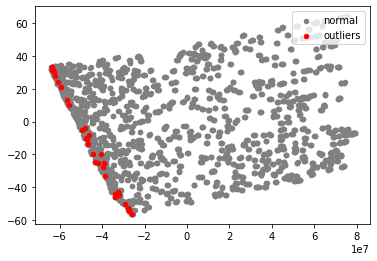

In [13]:

outliers=df_woutnan_with_anomaly_label_IsolationForest.loc[df_woutnan_with_anomaly_label_IsolationForest.anomaly_label==-1]
outlier_index=list(outliers.index)

pca=PCA(3)
pca.fit(df_woutnan_with_anomaly_label_IsolationForest)
res=pd.DataFrame(pca.transform(df_woutnan_with_anomaly_label_IsolationForest))

b1=plt.scatter(res[0],res[1],c='gray',s=20,label="normal")
b1=plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1],c='red',s=20,edgecolor="red",label="outliers")
plt.legend(loc="upper right")
plt.show()
#pca dimension=3

In [14]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random

In [15]:
svm=OneClassSVM(kernel='rbf',gamma=0.00001,nu=0.1) #tried to change parameters

In [16]:
svm.fit(df_woutnan)
pred=svm.predict(df_woutnan)
#svm

In [17]:
anomaly_index=where(pred==-1)
6

In [18]:
values

,onehotencoder__Result by Reviewer A_accept,onehotencoder__Result by Reviewer A_reject,onehotencoder__Result by Reviewer B_accept,onehotencoder__Result by Reviewer B_reject,onehotencoder__Result by Reviewer C_accept,onehotencoder__Result by Reviewer C_reject,onehotencoder__Result by Reviewer X_accept,onehotencoder__Result by Reviewer X_reject,onehotencoder__concept:name_accept,onehotencoder__concept:name_collect reviews,...,onehotencoder__org:resource_Mike,onehotencoder__org:resource_Pam,onehotencoder__org:resource_Pete,onehotencoder__org:resource_Sam,onehotencoder__org:resource_Sara,onehotencoder__org:resource_Wil,remainder__case:concept:name,remainder__time:timestamp,anomaly_label,anomaly_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,1136070000.0,1,-0.494664
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,1136502000.0,1,-0.456389
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1136761200.0,1,-0.515552
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,1136847600.0,-1,-0.566765
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1136934000.0,-1,-0.544645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,99,1226012400.0,1,-0.408320
3296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,99,1226012400.0,1,-0.429044
3297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,99,1226098800.0,1,-0.408692
3301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,99,1233097200.0,1,-0.417175


In [19]:
anomaly_index=anomaly_index[0].tolist()


In [20]:
print(len(anomaly_index))

1012


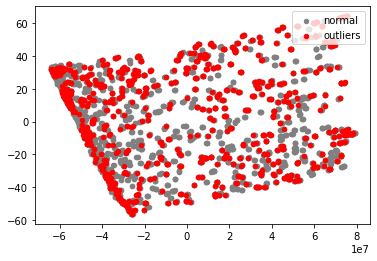

In [25]:
pca=PCA(3)
pca.fit(df_woutnan)
res=pd.DataFrame(pca.transform(df_woutnan))

b1=plt.scatter(res[0],res[1],c='gray',s=20,label="normal")
b1=plt.scatter(res.iloc[anomaly_index,0],res.iloc[anomaly_index,1],c='red',s=20,edgecolor="red",label="outliers")
plt.legend(loc="upper right")
plt.show()
#pca

In [42]:
traces=[[] for i in range(4000)]
df_t=df_final.transpose()
for i in df_t:
    x=-1
    #traces[i].append(df_t[i])
    
    for j in range(8,17):
        if df_t[i][j]==1.0:
            x=j-7
    print(x)
    traces[df_t[i][-3]].append(x)
#traces

                                                            0     \
onehotencoder__Result by Reviewer A_accept                   0.0   
onehotencoder__Result by Reviewer A_reject                   0.0   
onehotencoder__Result by Reviewer B_accept                   0.0   
onehotencoder__Result by Reviewer B_reject                   0.0   
onehotencoder__Result by Reviewer C_accept                   0.0   
onehotencoder__Result by Reviewer C_reject                   0.0   
onehotencoder__Result by Reviewer X_accept                   0.0   
onehotencoder__Result by Reviewer X_reject                   0.0   
onehotencoder__concept:name_accept                           0.0   
onehotencoder__concept:name_collect reviews                  0.0   
onehotencoder__concept:name_decide                           0.0   
onehotencoder__concept:name_get review 1                     0.0   
onehotencoder__concept:name_get review 2                     0.0   
onehotencoder__concept:name_get review 3        

3
8
8
3
3
8
8
3
3
8
8
3
3
8
8
7
3
3
1
1
9
9
4
6
2
2
3
3
8
8
3
3
8
8
3
3
8
8
3
3
8
8
7
3
3
1
1
9
9
2
2
3
3
8
8
7
3
3
8
8
3
3
8
8
7
3
3
8
8
3
3
8
8
3
3
8
8
7
3
3
-1
-1
9
9
6
4
5
2
2
3
3
8
8
3
3
8
8
3
3
8
8
7
3
3
8
8
3
3
8
8
7
3
3
1
1
9
9
5
4
2
2
3
3
8
8
3
3
8
8
3
3
8
8
7
3
3
8
8
7
3
3
1
1
9
9
2
2
3
3
8
8
7
3
3
8
8
3
3
8
8
3
3
8
8
3
3
8
8
3
3
8
8
3
3
8
8
7
3
3
8
8
3
3
8
8
3
3
8
8
3
3
8
8
7
3
3
8
8
7
3
3
8
8
3
3
8
8
7
3
3
8
8
3
3
-1
-1
9
9
4
5
2
2
3
3
8
8
7
3
3
8
8
3
3
8
8
3
3
8
8
3
3
8
8
7
3
3
8
8
7
3
3
8
8
7
3
3
8
8
3
3
-1
-1
9
9
5
2
2
3
3
8
8
7
3
3
8
8
3
3
8
8
7
3
3
8
8
7
3
3
1
1
9
9
4
5
2
2
3
3
8
8
7
3
3
8
8
7
3
3
8
8
7
3
3
8
8
7
3
3
-1
-1
9
9
6
2
2
3
3
8
8
7
3
3
8
8
7
3
3
8
8
7
3
3
8
8
7
3
3
1
1
9
9
4
5
2
2
3
3
8
8
7
3
3
-1
-1
9
9
5
4
6
2
2
3
3
-1
-1
9
9
5
4
2
2
3
3
8
8
3
3
8
8
7
3
3
8
8
7
3
3
8
8
7
3
3
-1
-1
9
9
6
5
2
2
3
3
8
8
3
3
8
8
7
3
3
8
8
7
3
3
8
8
3
3
1
1
9
9
4
5
2
2
3
3
8
8
3
3
8
8
7
3
3
8
8
3
3
8
8
7
3
3
8
8
7
3
3
1
1
9
9
4
2
2
3
3
8
8
3
3
8
8
7
3
3
8
8
3
3
8
8
3
3
8
8
7
3


svm

